In [1]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
import glob
from skimage import io

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#############################################################
    
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K


SIZE = 150
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())    
############################################################### 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [6]:
batch_size = 16
#Let's prepare our data. We will use .flow_from_directory() 
#to generate batches of image data (and their labels) 
#directly from our png in their respective folders.

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for validation:
# only rescaling. But you can try other operations
validation_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data

In [17]:
train_path = 'gdrive/My Drive/CV_for_miscrophy/Image_classification/train/'
valid_path = 'gdrive/My Drive/CV_for_miscrophy/Image_classification/test/'

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_path,  # this is the input directory
        target_size=(150, 150),  # all images will be resized to 64x64
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels


Found 27355 images belonging to 2 classes.


In [33]:
validation_generator = validation_datagen.flow_from_directory(
        valid_path,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary',
        shuffle = False)

Found 204 images belonging to 2 classes.


In [34]:
model.fit(
        train_generator,
        steps_per_epoch=200 // batch_size,    #The 2 slashes division return rounded integer
        epochs=5,
        validation_data=validation_generator,
        validation_steps=100 // batch_size)


Epoch 1/5
12/12 [==============================] - 51s 4s/step - loss: 0.5839 - accuracy: 0.7760 - val_loss: 0.5015 - val_accuracy: 0.6771
Epoch 2/5
12/12 [==============================] - 46s 4s/step - loss: 0.5344 - accuracy: 0.7760 - val_loss: 0.4394 - val_accuracy: 0.7604
Epoch 3/5
12/12 [==============================] - 48s 4s/step - loss: 0.5284 - accuracy: 0.8021 - val_loss: 0.5061 - val_accuracy: 0.6667
Epoch 4/5
12/12 [==============================] - 47s 4s/step - loss: 0.3862 - accuracy: 0.8750 - val_loss: 0.4827 - val_accuracy: 0.7396
Epoch 5/5
12/12 [==============================] - 46s 4s/step - loss: 0.4490 - accuracy: 0.8646 - val_loss: 0.4397 - val_accuracy: 0.7500


In [28]:
import numpy as np


In [35]:
predictions = model.predict(validation_generator)


In [36]:
y_true = validation_generator.classes

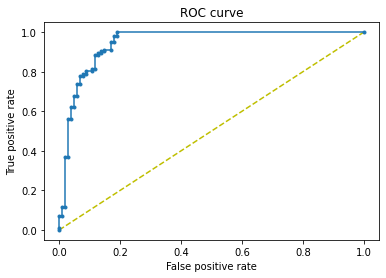

In [37]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_true, predictions)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [39]:
#pip install  scikit-plot

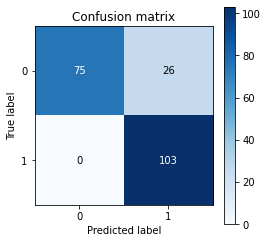

In [43]:
import scikitplot as skplt
mythreshold=0.5
y_pred = (predictions>= mythreshold).astype(int)
skplt.metrics.plot_confusion_matrix(
        y_true,
        y_pred,
        figsize=(4, 4),title="Confusion matrix")


plt.show()

In [ ]:
#looks good so far